In [1]:
# pip install landsatxplore

username = "senv_team"

password= "ketchup&Mustard1"

In [2]:
if False:
    #!/usr/bin/python

    # https://urs.earthdata.nasa.gov/documentation/for_users/data_access/python

    import requests # get the requsts library from https://github.com/requests/requests



    # overriding requests.Session.rebuild_auth to mantain headers when redirected

    class SessionWithHeaderRedirection(requests.Session):

        AUTH_HOST = 'urs.earthdata.nasa.gov'

        def __init__(self, username, password):

            super().__init__()

            self.auth = (username, password)



       # Overrides from the library to keep headers when redirected to or from

       # the NASA auth host.

        def rebuild_auth(self, prepared_request, response):

            headers = prepared_request.headers

            url = prepared_request.url



            if 'Authorization' in headers:

                original_parsed = requests.utils.urlparse(response.request.url)

                redirect_parsed = requests.utils.urlparse(url)



                if (original_parsed.hostname != redirect_parsed.hostname) and redirect_parsed.hostname != self.AUTH_HOST and original_parsed.hostname != self.AUTH_HOST:
                    del headers['Authorization']



            return



    # create session with the user credentials that will be used to authenticate access to the data



    session = SessionWithHeaderRedirection(username, password)



    # the url of the file we wish to retrieve

    url = "https://n5eil01u.ecs.nsidc.org/MOST/MOD10A1.006/2016.12.31/MOD10A1.A2016366.h14v03.006.2017002110336.hdf.xml"
    url = "https://oceancolor.gsfc.nasa.gov/showimages/MODISA/IMAGES/CHL/L3/2023/0914/AQUA_MODIS.20230914.L3m.DAY.CHL.chlor_a.4km.NRT.nc.png"
    url = "https://oceancolor.gsfc.nasa.gov/showimages/MODISA/IMAGES/RRS/L3/2023/0925/AQUA_MODIS.20230925.L3m.DAY.RRS.Rrs_412.4km.NRT.nc.png"

    # extract the filename from the url to be used when saving the file


    import os
    if not os.path.isdir("tmp_dir"):
        os.makedirs("tmp_dir")
    filename = os.path.join("tmp_dir", url[url.rfind('/')+1:])



    try:

        # submit the request using the session

        response = session.get(url, stream=True)

        print(response.status_code)



        # raise an exception in case of http errors

        response.raise_for_status()  



        # save the file

        with open(filename, 'wb') as fd:

            for chunk in response.iter_content(chunk_size=1024*1024):

                print(chunk)

                fd.write(chunk)



    except requests.exceptions.HTTPError as e:

        # handle any errors here

        print(e)

In [3]:
if False:
    from usgs import api

    # Set the EarthExplorer catalog
    node = 'EE'# this indicates earth explorer website

    # Set the Hyperion and Landsat 8 dataset
    hyperion_dataset = 'EO1_HYP_PUB'
    landsat8_dataset = 'LANDSAT_8'

    # Set the scene ids
    hyperion_scene_id = 'EO1H1820422014302110K2_SG1_01'
    landsat8_scene_id = 'LC80290462015135LGN00'

    # Submit requests to USGS servers
    api.metadata(hyperion_dataset, node, [hyperion_scene_id])
    api.metadata(landsat8_dataset, node, [landsat8_scene_id])

In [4]:
if False:
    from usgs import api


    def submit_where_query():

        # USGS uses numerical codes to identify queryable fields
        # To see which fields are queryable for a specific dataset,
        # send off a request to dataset-fields

        results = api.dataset_fields('LANDSAT_8_C1', 'EE')

        for field in results['data']:
            print(field)

        # WRS Path happens to have the field id 20514
        where = {
            20514: '043'
        }
        results = api.search('LANDSAT_8_C1', 'EE', where=where, start_date='2017-04-01', end_date='2017-05-01', max_results=10, extended=True)

        for scene in results['data']['results']:
            print(scene)

    submit_where_query()

In [ ]:
import json
from landsatxplore.api import API

# Initialize a new API instance and get an access key
api = API(username, password)

# Search for Landsat TM scenes
scenes = api.search(
    dataset='landsat_ot_c2_l1',
    latitude=37.47,
    longitude=-122.37,
    start_date='2013-01-01',
    end_date='2023-10-01',
    max_cloud_cover=10
)

print(f"{len(scenes)} scenes found.")

# Process the result
for scene in scenes:
    print(scene)
    print(scene['acquisition_date'].strftime('%Y-%m-%d'))
    # Write scene footprints to disk
    #fname = f"{scene['landsat_product_id']}.geojson"
    #with open(fname, "w") as f:
    #    json.dump(scene['spatial_coverage'].__geo_interface__, f)
    

api.logout()

In [ ]:
from landsatxplore.earthexplorer import EarthExplorer
import tarfile
import os

ee = EarthExplorer(username, password)


output_dir = 'E:/Christina/land/tmp_dir/'
# "tmp_dir/LC08_L1TP_119034_20130320_20200913_02_T1.tar"

# scene["landsat_scene_id"]
for scene in scenes:
    try:
        print(scene["landsat_scene_id"])
        ee.download(scene["landsat_scene_id"], output_dir=output_dir)
        
        tar = tarfile.open(os.path.join(output_dir, scene["display_id"] + ".tar"))
        tar.extractall(path=os.path.join(output_dir, scene["display_id"]))
        tar.close()

    except Exception as E:
        print(E)

ee.logout()

LC90440342023270LGN00
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
LC80440342023198LGN00
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
LC90440342023110LGN00
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
LC90440342023094LGN00
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
LC80440342023086LGN00
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
LC90440342023046LGN01
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
LC90440342023030LGN01
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Upd

1.00GB [02:19, 7.71MB/s]


LC80440342022307LGN00
Download failed with dataset id 1 of 2. Re-trying with the next one.


 2


LC90440342022299LGN01
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
LC80440342022259LGN00
Download failed with dataset id 1 of 2. Re-trying with the next one.


  4%|██▊                                                                          | 41.8M/1.12G [00:16<07:14, 2.66MB/s]


LC90440342022251LGN02
Download failed with dataset id 1 of 2. Re-trying with the next one.
None of the archived ids succeeded! Update necessary!
LC90440342022171LGN01
Download failed with dataset id 1 of 2. Re-trying with the next one.


In [4]:
import tarfile
import os
output_dir = 'E:/Christina/land/tmp_dir/'
tar = tarfile.open(os.path.join(output_dir, 'LC08_L1TP_044034_20221119_20221128_02_T1' + ".tar"))
tar.extractall(path=os.path.join(output_dir, 'LC08_L1TP_044034_20221119_20221128_02_T1'))
tar.close()

LC08_L1TP_044034_20221119_20221128_02_T1_ANG.txt
LC08_L1TP_044034_20221119_20221128_02_T1_B1.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_B10.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_B11.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_B2.TIF
b
26505
LC08_L1TP_044034_20221119_20221128_02_T1_B3.TIF
g
28262
r
28262
LC08_L1TP_044034_20221119_20221128_02_T1_B4.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_B5.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_B6.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_B7.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_B8.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_B9.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_MTL.json
LC08_L1TP_044034_20221119_20221128_02_T1_MTL.txt
LC08_L1TP_044034_20221119_20221128_02_T1_MTL.xml
LC08_L1TP_044034_20221119_20221128_02_T1_QA_PIXEL.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_QA_RADSAT.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_SAA.TIF
LC08_L1TP_044034_20221119_20221128_02_T1_stac.json
LC08_L1TP_044034_20221119_20221128_02_T1

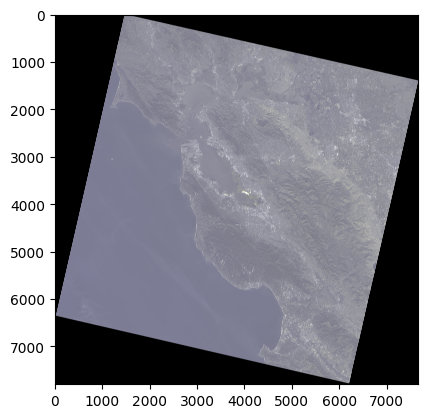

In [45]:
from skimage import io
io.use_plugin('pil')
import matplotlib.pyplot as plt
train_data_path = r"E:\Christina\land\tmp_dir\LC08_L1TP_044034_20221119_20221128_02_T1"
import numpy as np

import cv2

stacked_image = None

images = os.listdir(train_data_path)

for image_name in images:
    
    print(image_name)
    
    if "B2" in image_name:
        print("b")
        img_path = os.path.join(train_data_path, image_name) 
        b = io.imread(img_path, plugin='tifffile')
        print(b.max())
        b = np.float64(b)
        
    if "B3" in image_name:
        print("g")
        img_path = os.path.join(train_data_path, image_name) 
        g = io.imread(img_path, plugin='tifffile')
        print(g.max())
        g = np.float64(g)
        

    if "B3" in image_name:
        print("r")
        img_path = os.path.join(train_data_path, image_name) 
        r = io.imread(img_path, plugin='tifffile')
        print(r.max())
        r = np.float64(r)
        
        
        
b *= (1.0/(65536/5) )
g *= (1.0/(65536/5) )
r *= (1.0/(65536/5) )   

b = np.clip(b, a_min = 0, a_max = 1) 
g = np.clip(g, a_min = 0, a_max = 1) 
r = np.clip(r, a_min = 0, a_max = 1) 


print(np.unique(b))
print(np.unique(g))
print(np.unique(r))

rgb = np.dstack((r,g,b))







plt.imshow(rgb)


In [48]:
from PIL import Image

rgb = cv2.normalize(rgb, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8)
im = Image.fromarray(rgb)
im.save(os.path.join(train_data_path, "your_file.jpeg"))

In [36]:
65536/3

21845.333333333332